# Support Vector Machine Classification of Iris Flower
The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 
Attri

## Attributes of the Iris dataset
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [104]:
## Import the required libraries
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [105]:
iris = datasets.load_iris()

In [106]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [107]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [108]:
iris.target_names, iris.target

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [109]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


## Create SVM Model

In [110]:
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

In [187]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [188]:
X = iris.data[:,:2] ## we are taking the first two features - Sepal length and width
y = iris.target

### Plotting the Iris data - Sepal Length & Width

Text(0,0.5,'Sepal width')

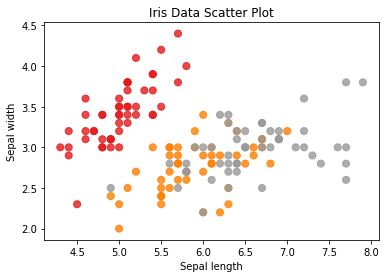

In [189]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1', alpha=0.8);
plt.title('Iris Data Scatter Plot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Different Support Vector Classifiers

In [190]:
titles = ['SVC with linear kernel',
          'SVC with polynomial kernel',
          'SVC with RBF kernel',
          'LinearSVC (linear kernel)']

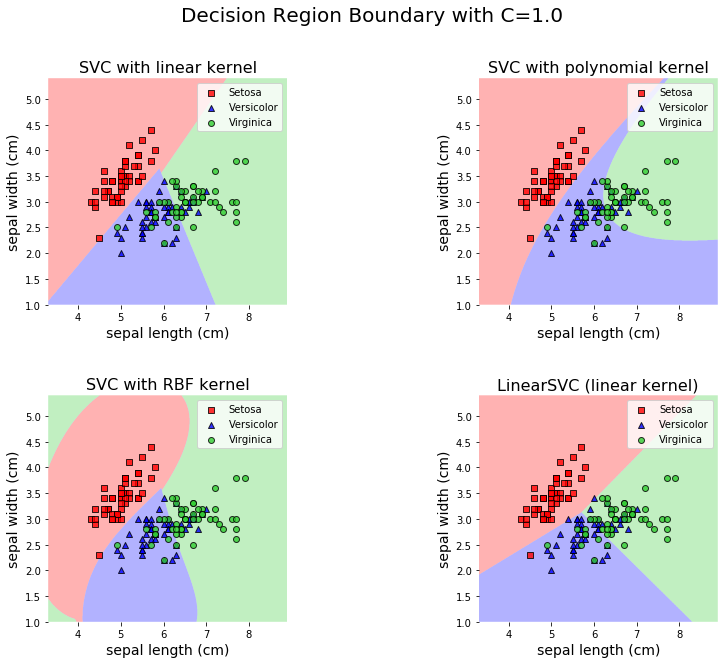

In [191]:
C=1.0
### Support Vector Classifier ###
svc_linear = svm.SVC(kernel='linear', decision_function_shape='ovr', C=C).fit(X, y)
svc_poly = svm.SVC(kernel='poly', decision_function_shape='ovr', degree=3, C=C).fit(X, y)
svc_rbf = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', gamma = 0.7, C=C).fit(X, y)
svc_sigmoid = svm.SVC(kernel = 'sigmoid', decision_function_shape='ovr' , C=C).fit(X, y)
svc_lin = svm.LinearSVC(C=1.0).fit(X, y)
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Decision Region Boundary with C=1.0', fontsize=20)
for i, clf in enumerate((svc_linear, svc_poly, svc_rbf, svc_lin)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.8, hspace=0.4)
    plot_decision_regions(X=X, y=y, clf=clf, 
                      legend=2)
    plt.xlabel(iris.feature_names[0], size=14)
    plt.ylabel(iris.feature_names[1], size=14)
    plt.title(titles[i], size=16)
    L = plt.legend()
    L.get_texts()[0].set_text('Setosa')
    L.get_texts()[1].set_text('Versicolor')
    L.get_texts()[2].set_text('Virginica')

## Support Vectors 

In [192]:
print("Support Vectors for SVC RBF Kernel")
print(str(svc_rbf.support_vectors_).replace('\n',''))
print(len(svc_rbf.support_vectors_))

Support Vectors for SVC RBF Kernel
[[4.9 3. ] [4.4 2.9] [4.8 3. ] [5.8 4. ] [5.7 3.8] [5.4 3.4] [5.  3. ] [5.4 3.4] [5.5 3.5] [4.5 2.3] [4.8 3. ] [7.  3.2] [6.4 3.2] [6.9 3.1] [6.5 2.8] [5.7 2.8] [6.3 3.3] [4.9 2.4] [6.6 2.9] [5.2 2.7] [5.  2. ] [5.9 3. ] [6.  2.2] [6.1 2.9] [6.7 3.1] [5.6 3. ] [5.8 2.7] [6.2 2.2] [5.9 3.2] [6.1 2.8] [6.3 2.5] [6.1 2.8] [6.4 2.9] [6.6 3. ] [6.8 2.8] [6.7 3. ] [6.  2.9] [5.8 2.7] [6.  2.7] [5.4 3. ] [6.  3.4] [6.7 3.1] [6.3 2.3] [5.6 3. ] [6.1 3. ] [5.8 2.6] [5.  2.3] [5.7 3. ] [5.7 2.9] [6.2 2.9] [5.1 2.5] [5.7 2.8] [6.3 3.3] [5.8 2.7] [6.3 2.9] [6.5 3. ] [4.9 2.5] [6.7 2.5] [6.5 3.2] [6.4 2.7] [6.8 3. ] [5.7 2.5] [5.8 2.8] [6.4 3.2] [6.5 3. ] [7.7 2.6] [6.  2.2] [5.6 2.8] [6.3 2.7] [6.2 2.8] [6.1 3. ] [6.4 2.8] [7.9 3.8] [6.4 2.8] [6.3 2.8] [6.1 2.6] [6.3 3.4] [6.4 3.1] [6.  3. ] [6.7 3.1] [5.8 2.7] [6.7 3. ] [6.3 2.5] [6.5 3. ] [6.2 3.4] [5.9 3. ]]
86


### There were 86 support vectors for the SVM kernel RBF with C=1.0 and gamma = 0.7

In [193]:
y_true, y_pred = y_test, svc_rbf.predict(X_test)
print(classification_report(y_true, y_pred))

svc_predicted= svc_rbf.predict(X_test)

svc_score = round(svc_rbf.score(X_train, y_train) * 100, 2)
svc_score_test = round(svc_rbf.score(X_test, y_test) * 100, 2)

print('SVM Score: \n', svc_score)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test,svc_predicted))
print(confusion_matrix(y_test,svc_predicted))
print(classification_report(y_test,svc_predicted))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.00      0.00      0.00        11
          2       0.46      1.00      0.63        16

avg / total       0.19      0.42      0.26        38

SVM Score: 
 30.36
SVM Test Score: 
 42.11
Accuracy: 
 0.42105263157894735
[[ 0  3  8]
 [ 0  0 11]
 [ 0  0 16]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.00      0.00      0.00        11
          2       0.46      1.00      0.63        16

avg / total       0.19      0.42      0.26        38



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Tuning the parameters

## RBF Kernel with different C & gamma values

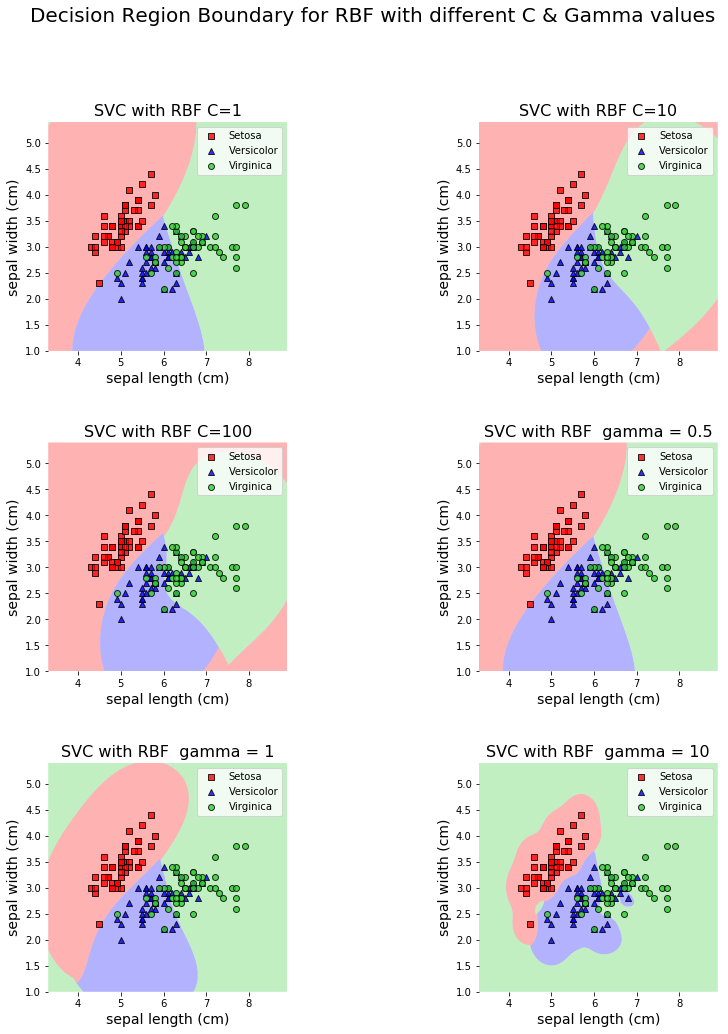

In [194]:
### Support Vector Classifier ###
titles = ['SVC with RBF C=1',
          'SVC with RBF C=10',
          'SVC with RBF C=100',
          'SVC with RBF  gamma = 0.5',
          'SVC with RBF  gamma = 1',
          'SVC with RBF  gamma = 10']
svc_rbf1 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', C=1).fit(X, y)
svc_rbf2 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', C=10).fit(X, y)
svc_rbf3 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', C=100).fit(X, y)
svc_rbf4 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', gamma = 0.5).fit(X, y)
svc_rbf5 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', gamma = 1).fit(X, y)
svc_rbf6 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', gamma = 10).fit(X, y)
fig = plt.figure(figsize=(12, 16))
fig.suptitle('Decision Region Boundary for RBF with different C & Gamma values', fontsize=20)
for i, clf in enumerate((svc_rbf1, svc_rbf2, svc_rbf3, svc_rbf4, svc_rbf5, svc_rbf6)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.8, hspace=0.4)
    plot_decision_regions(X=X, y=y, clf=clf, 
                      legend=2)
    plt.xlabel(iris.feature_names[0], size=14)
    plt.ylabel(iris.feature_names[1], size=14)
    plt.title(titles[i], size=16)
    L = plt.legend()
    L.get_texts()[0].set_text('Setosa')
    L.get_texts()[1].set_text('Versicolor')
    L.get_texts()[2].set_text('Virginica')

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# shuffle the dataset
X, y = shuffle(X, y, random_state=0)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on training set:

0.652 (+/-0.112) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.768 (+/-0.232) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.777 (+/-0.236) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.804 (+/-0.220) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.786 (+/-0.205) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.795 (+/-0.233) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.786 (+/-0.220) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.804 (+/-0.220) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.786 (+/-0.205) for {'C': 100, 'gam

In [196]:
clf.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [197]:
parameters = [{'kernel': ['rbf'],
               'gamma': [0.01],
                'C': [100]}]
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr', C=100, gamma=0.01, kernel='rbf'), parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.01], 'C': [100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [198]:
svc_predicted= clf.predict(X_test)

svc_score = round(clf.score(X_train, y_train) * 100, 2)
svc_score_test = round(clf.score(X_test, y_test) * 100, 2)

print('SVM Score: \n', svc_score)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test,svc_predicted))
print(confusion_matrix(y_test,svc_predicted))
print(classification_report(y_test,svc_predicted))

SVM Score: 
 80.36
SVM Test Score: 
 78.95
Accuracy: 
 0.7894736842105263
[[11  0  0]
 [ 0  9  2]
 [ 0  6 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.60      0.82      0.69        11
          2       0.83      0.62      0.71        16

avg / total       0.81      0.79      0.79        38



### The accuracy increased from 42 to 81% after tuning the parameters

# I'm going to create 2 new features that are the product of petal length & sepal length, petal width & sepal width

In [199]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [200]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [201]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [202]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [203]:
iris_df['length'] = iris_df['sepal length (cm)']*iris_df['petal length (cm)']
iris_df['width'] = iris_df['sepal width (cm)']*iris_df['petal width (cm)']
iris_df['target'] = iris.target
iris_df['targetname']=''
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),length,width,target,targetname
0,5.1,3.5,1.4,0.2,7.14,0.70,0,
1,4.9,3.0,1.4,0.2,6.86,0.60,0,
2,4.7,3.2,1.3,0.2,6.11,0.64,0,
3,4.6,3.1,1.5,0.2,6.90,0.62,0,
4,5.0,3.6,1.4,0.2,7.00,0.72,0,


In [204]:
iris_df['targetname'][iris_df['target'] ==0]='setosa'
iris_df['targetname'][iris_df['target'] ==1]='versicolor'
iris_df['targetname'][iris_df['target'] ==2]='virginica'

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [205]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),length,width,target,targetname
145,6.7,3.0,5.2,2.3,34.84,6.90,2,virginica
146,6.3,2.5,5.0,1.9,31.50,4.75,2,virginica
147,6.5,3.0,5.2,2.0,33.80,6.00,2,virginica
148,6.2,3.4,5.4,2.3,33.48,7.82,2,virginica
149,5.9,3.0,5.1,1.8,30.09,5.40,2,virginica


In [210]:
X = iris_df[['length', 'width']].values
y = iris_df['target'].values

Text(0,0.5,'Sepal width')

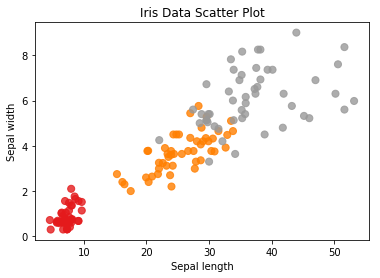

In [211]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1', alpha=0.8);
plt.title('Iris Data Scatter Plot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# RBF Kernel with different C and gamma values

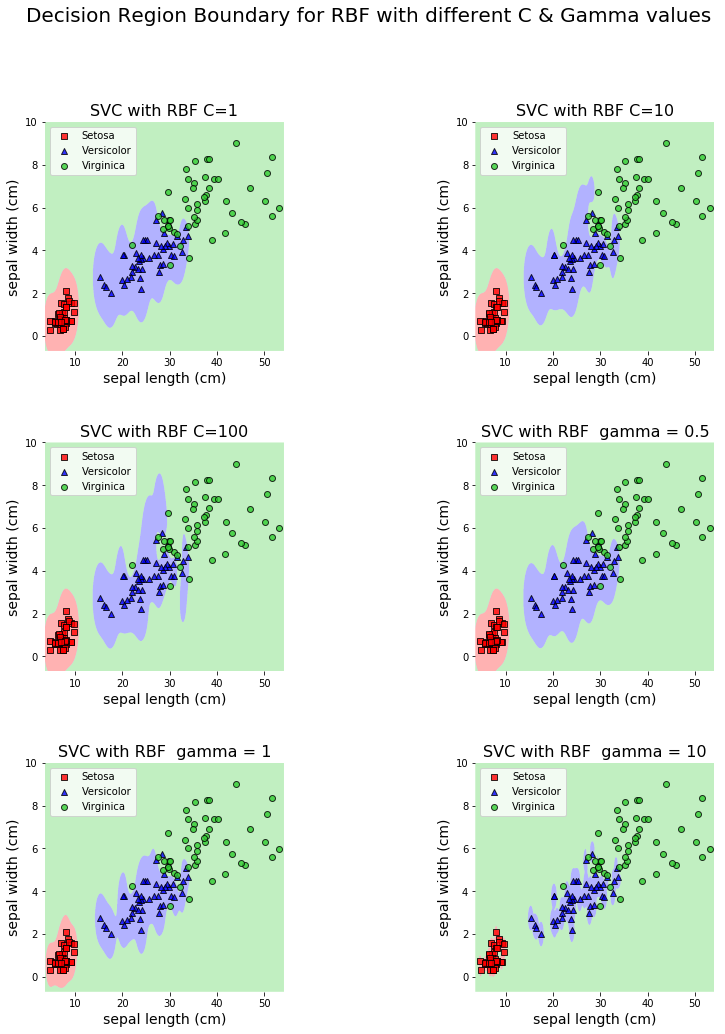

In [212]:
### Support Vector Classifier ###
titles = ['SVC with RBF C=1',
          'SVC with RBF C=10',
          'SVC with RBF C=100',
          'SVC with RBF  gamma = 0.5',
          'SVC with RBF  gamma = 1',
          'SVC with RBF  gamma = 10']
svc_rbf1 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', C=1).fit(X, y)
svc_rbf2 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', C=10).fit(X, y)
svc_rbf3 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', C=100).fit(X, y)
svc_rbf4 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', gamma = 0.5).fit(X, y)
svc_rbf5 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', gamma = 1).fit(X, y)
svc_rbf6 = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', gamma = 10).fit(X, y)
fig = plt.figure(figsize=(12, 16))
fig.suptitle('Decision Region Boundary for RBF with different C & Gamma values', fontsize=20)
for i, clf in enumerate((svc_rbf1, svc_rbf2, svc_rbf3, svc_rbf4, svc_rbf5, svc_rbf6)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.8, hspace=0.4)
    plot_decision_regions(X=X, y=y, clf=clf, 
                      legend=2)
    plt.xlabel(iris.feature_names[0], size=14)
    plt.ylabel(iris.feature_names[1], size=14)
    plt.title(titles[i], size=16)
    L = plt.legend()
    L.get_texts()[0].set_text('Setosa')
    L.get_texts()[1].set_text('Versicolor')
    L.get_texts()[2].set_text('Virginica')

# Predict with C=1

In [216]:
y_true, y_pred = y_test, svc_rbf1.predict(X_test)
print(classification_report(y_true, y_pred))

svc_predicted= svc_rbf1.predict(X_test)

svc_score = round(svc_rbf1.score(X_train, y_train) * 100, 2)
svc_score_test = round(svc_rbf1.score(X_test, y_test) * 100, 2)

print('SVM Score: \n', svc_score)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test,svc_predicted))
print(confusion_matrix(y_test,svc_predicted))
print(classification_report(y_test,svc_predicted))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.00      0.00      0.00        11
          2       0.38      0.81      0.52        16

avg / total       0.16      0.34      0.22        38

SVM Score: 
 25.89
SVM Test Score: 
 34.21
Accuracy: 
 0.34210526315789475
[[ 0  0 11]
 [ 1  0 10]
 [ 3  0 13]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.00      0.00      0.00        11
          2       0.38      0.81      0.52        16

avg / total       0.16      0.34      0.22        38



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Tuning the parameters

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import shuffle

# shuffle the dataset
X, y = shuffle(X, y, random_state=0)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on training set:

0.795 (+/-0.187) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.911 (+/-0.109) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.902 (+/-0.126) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.902 (+/-0.126) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.875 (+/-0.167) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.848 (+/-0.149) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.920 (+/-0.101) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.911 (+/-0.109) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.893 (+/-0.140) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.857 (+/-0.165) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.866 (+/-0.142) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.866 (+/-0.142) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.911 (+/-0.109) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.893 (+/-0.140) for {'C': 100, 'ga

In [218]:
clf.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [219]:
parameters = [{'kernel': ['rbf'],
               'gamma': [0.0001],
                'C': [10]}]
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr', C=10, gamma=0.0001, kernel='rbf'), parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.0001], 'C': [10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [221]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

svc_predicted= clf.predict(X_test)

svc_score = round(clf.score(X_train, y_train) * 100, 2)
svc_score_test = round(clf.score(X_test, y_test) * 100, 2)

print('SVM Score: \n', svc_score)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test,svc_predicted))
print(confusion_matrix(y_test,svc_predicted))
print(classification_report(y_test,svc_predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.60      0.82      0.69        11
          2       0.83      0.62      0.71        16

avg / total       0.81      0.79      0.79        38

SVM Score: 
 91.96
SVM Test Score: 
 78.95
Accuracy: 
 0.7894736842105263
[[11  0  0]
 [ 0  9  2]
 [ 0  6 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.60      0.82      0.69        11
          2       0.83      0.62      0.71        16

avg / total       0.81      0.79      0.79        38

